<a href="https://colab.research.google.com/github/victormazevedo/kickstart-random-forest-model/blob/master/Kickstarter_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Kickstarter 2018 Model

Este projeto é destinado à disciplina de Inteligência Artificial, ministrada pelo docente Lucas Figueira Baggio. O objetivo deste projeto é realizar uma série de estudos a respeito da plataforma *Kickstarter*, utilizando *Random Forest* para classificar se um projeto terá ou não sucesso, com base em seu *dataset* obtido do [Kaggle](https://www.kaggle.com/kemical/kickstarter-projects).

*Kickstarter* é a maior plataforma de financiamento coletivo do mundo que está sempre buscando apoiar projetos inovadores e independentes, podendo assim empoderar pequenos, mas criativos, desenvolvedores, artistas e músicos.

# Importando as blibliotecas necessárias

É necessário fazer o *import* do:

*   [Pandas](https://pandas.pydata.org/) para manipulação dos dados;
*   [Matplotlib](https://matplotlib.org/) para a plotagem de gráficos;






In [0]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier

# Primeiro passo
Primeiramente, é necessário realizar o *upload* do arquivo .csv referente ao *dataset* que será utilizado. Neste projeto, será utilizado um *dataset* proveniente do *Kaggle* no qual contém as informações de todos os projetos do ano de 2018 do *Kickstarter*. Após o arquivo em mãos, realizar o *upload* do mesmo no *Dropbox*, porém atentar-se ao compartilhamento público!

Após o passo acima, realize uma conexão via *!wget*  ao *Dropbox* inserindo o link gerado no *Dropbox*.

Feito isso, criei uma variável de nome *df* e nela utilizei o recurso do *Pandas* para a leitura de um arquivo .csv. Dentro do mesmo inseri o nome do csv desejado.

In [0]:
!wget 'https://www.dropbox.com/s/g6qtxm3va3h50pi/ks-projects-201801.csv?dl=0'
df = pd.read_csv('ks-projects-201801.csv?dl=0')

--2019-06-10 12:15:24--  https://www.dropbox.com/s/g6qtxm3va3h50pi/ks-projects-201801.csv?dl=0
Resolving www.dropbox.com (www.dropbox.com)... 162.125.1.1, 2620:100:6016:1::a27d:101
Connecting to www.dropbox.com (www.dropbox.com)|162.125.1.1|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/g6qtxm3va3h50pi/ks-projects-201801.csv [following]
--2019-06-10 12:15:24--  https://www.dropbox.com/s/raw/g6qtxm3va3h50pi/ks-projects-201801.csv
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://ucbf6b8b5ee13624abc9be23fa02.dl.dropboxusercontent.com/cd/0/inline/AihloW2TrkSI7hRHW22VkWrNxDOty_s9VkLYhtIQ_xSvPiodug8eG4b3ODR0T3QSV-BchZPWjTJzlnRQ83ovOX5geALA_wocVfAkM65RLqzBXQ/file# [following]
--2019-06-10 12:15:24--  https://ucbf6b8b5ee13624abc9be23fa02.dl.dropboxusercontent.com/cd/0/inline/AihloW2TrkSI7hRHW22VkWrNxDOty_s9VkLYhtIQ_xSvPiodug8eG4b3ODR0T3QSV-BchZPWjTJzlnRQ83ovOX5geALA_wocVfAk

# Verificando o dataset e seus atributos

Realizando um *head()* para nos mostrar as cinco primeiras linhas do dataset e observar suar variáveis e dados.

In [0]:
df.head()

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.0,2015-08-11 12:12:28,0.0,failed,0,GB,0.0,0.0,1533.95
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.0,2017-09-02 04:43:57,2421.0,failed,15,US,100.0,2421.0,30000.00
2,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.0,2013-01-12 00:20:50,220.0,failed,3,US,220.0,220.0,45000.00
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000.0,2012-03-17 03:24:11,1.0,failed,1,US,1.0,1.0,5000.00
4,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29,19500.0,2015-07-04 08:35:03,1283.0,canceled,14,US,1283.0,1283.0,19500.00


# Explicando cada coluna e seus devidos dados

Executando o *info*, perecebe-se que o dataset contém um total de 378661 linhas divididas em 15 colunas. Cada coluna representa um tipo de informação:

*   **ID:** é o número de identificação interno gerado na *Kickstarter*;
*   **name:** nome do projeto. O projeto nada mais é do que um trabalho que tem um fim e um determinado objetivo ( *goal*) a ser atingido. Pode ser fotografias, albuns musicais, vídeos, etc.;
*   **category:** neste *datset* a categoria se corresponde como uma sub-categoria das categorias principais. Por exemplo: tem-se a categoria *Film & Video* e dentro dela uma subcategoria *Documentary*;
*   **main_category:** é a categoria principal do projeto;
*   **currency:** é a moeda usada para apoiar o projeto;
*   **deadline:** é o prazo final de arrecadação de apoio ao projeot *crowdfunding*;
*   **goal:** o *goal* nada mais é que o objetivo monetário do projeto para o criador concluí-lo;
*   **launched:** data em que as arrecadações começaram;
*   **pledged:** valor arrecadado na moeda do projeto;
*   **state:** status do projeto;
*   **backers:** número de apoiadores;
*   **country:** o país do criador;
*   **usd pledged:** valor arrecadado em dólares (conversão realizada pelo *Kickstarter*);
*   **usd_pledged_real:** valor arrecadado em dólares convertido utilizando [Fixer API](https://fixer.io/);
*   **usd_goal_real:** a meta de arrecadação convertida em dólar;








In [0]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 378661 entries, 0 to 378660
Data columns (total 15 columns):
ID                  378661 non-null int64
name                378657 non-null object
category            378661 non-null object
main_category       378661 non-null object
currency            378661 non-null object
deadline            378661 non-null object
goal                378661 non-null float64
launched            378661 non-null object
pledged             378661 non-null float64
state               378661 non-null object
backers             378661 non-null int64
country             378661 non-null object
usd pledged         374864 non-null float64
usd_pledged_real    378661 non-null float64
usd_goal_real       378661 non-null float64
dtypes: float64(5), int64(2), object(8)
memory usage: 43.3+ MB
None


# Gráfico Distribuição de Status dos Projetos

Realizando a plotagem do gráfico em pizza, verifica-se que de todos os projetos, 52.2% falham e 35.4% conseguem sucesso.

Demais informações dos outros status abaixo.

Todos os gráficos do projeto foram realizados utilizando *matplotlib*

Pecentual de status em %: 
failed        52.22
successful    35.38
canceled      10.24
undefined      0.94
live           0.74
suspended      0.49
Name: state, dtype: float64
52.22


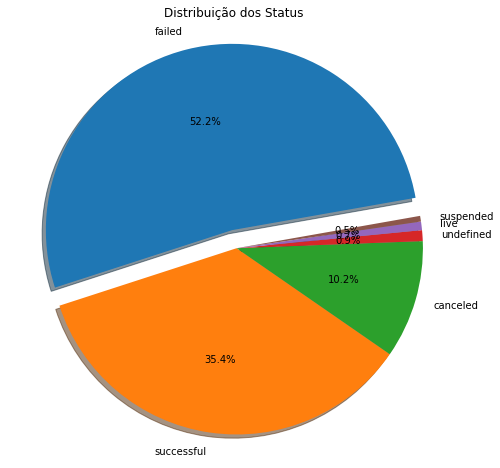

In [0]:
percentual_de_sucesso = round(df["state"].value_counts() / len(df["state"]) * 100,2)

print("Pecentual de status em %: ")
print(percentual_de_sucesso)

state = round(df["state"].value_counts() / len(df["state"]) * 100,2)

labels = list(state.index)
values = list(state.values)

fig1, ax1 = plt.subplots(figsize=(8, 8))

explode = (0.1, 0 , 0, 0 ,0 ,0)

print(percentual_success["failed"])

ax1.pie(values, explode = explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=10, labeldistance=1.1)

ax1.axis('equal')
ax1.set_title("Distribuição dos Status")
plt.show()

# Gráfico número de projetos por Categoria Principal

Neste gráfico, é realizado um estudo para verificar as 15 categorias em que mais são submetidos projetos. Observa-se que a categoria *Film & Video* está em primeiro lugar. Lembre-se: dentro de cada Categoria, há uma sub-categoria. Abaixo mais informações sobre as sub-categorias.

O gráfico em barras foi plotado utilizando *matplotlib*.

Nro. de projetos por Categoria: 
Film & Video    63585
Music           51918
Publishing      39874
Games           35231
Technology      32569
Design          30070
Art             28153
Food            24602
Fashion         22816
Theater         10913
Comics          10819
Photography     10779
Crafts           8809
Journalism       4755
Dance            3768
Name: main_category, dtype: int64


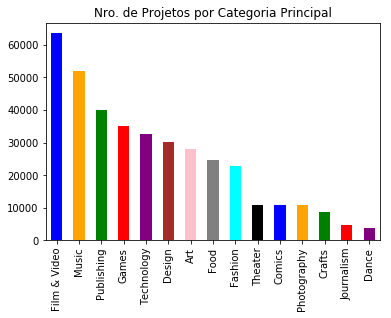

In [0]:
principais_categorias = df["main_category"].value_counts()
principais_categorias_fail = df[df["state"].isin(["failed","canceled","suspended"])]["main_category"].value_counts()
principais_categorias_sucesso = df[df["state"] == "successful"]["main_category"].value_counts()
color = ['blue', 'orange', 'green', 'red', 'purple', 'brown', 'pink', 'gray', 'cyan', 'black']

print("Nro. de projetos por Categoria: ")
print(principais_categorias)

principais_categorias.plot.bar(color = color)
plt.title("Nro. de Projetos por Categoria Principal")
plt.show()

# Gráfico número de projetos que falharam por Caregoria Principal

Neste gráfico, observa-se que, assim como acima é visto que a categoria *Film & Video* está em primeiro lugar no número de projetos no geral, ela também está em primeiro lugar nos projetos que falharam.


Nro. de projetos que falharam por Categoria: 
Film & Video    38776
Publishing      26813
Technology      25755
Music           25206
Games           22425
Design          19213
Food            18333
Fashion         16970
Art             16449
Photography      7425
Crafts           6618
Comics           4901
Theater          4337
Journalism       3712
Dance            1411
Name: main_category, dtype: int64


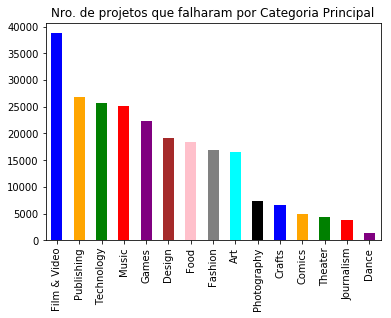

In [0]:
print("Nro. de projetos que falharam por Categoria: ")
print(principais_categorias_fail)

principais_categorias_fail.plot.bar(color = color)
plt.title("Nro. de projetos que falharam por Categoria Principal")
plt.show()

# Gráfico número de projetos que obitveram sucesso por Caregoria Principal

Neste gráfico, observa-se que, a categoria *Music* está em primeiro lugar das que obtiveram sucesso. Logo em seeguida, com pouca diferença, está *Film & Video*.


Nro. de projetos que obtiveram sucesso por Categoria : 
Music           24197
Film & Video    23623
Games           12518
Publishing      12300
Art             11510
Design          10550
Theater          6534
Technology       6434
Food             6085
Comics           5842
Fashion          5593
Photography      3305
Dance            2338
Crafts           2115
Journalism       1012
Name: main_category, dtype: int64


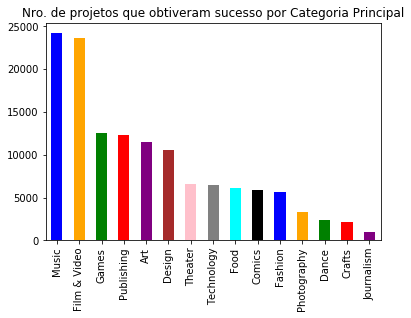

In [0]:
print("Nro. de projetos que obtiveram sucesso por Categoria : ")
print(principais_categorias_sucesso)

principais_categorias_sucesso.plot.bar(color = color)
plt.title("Nro. de projetos que obtiveram sucesso por Categoria Principal")
plt.show()

Nro. de Sub Categorias que obtiveram sucesso: 
Product Design      7962
Tabletop Games      7866
Shorts              6673
Music               6432
Documentary         5924
Theater             4405
Indie Rock          3618
Rock                3500
Art                 3385
Food                3297
Film & Video        3070
Country & Folk      2812
Comics              2506
Video Games         2386
Children's Books    2348
Fiction             2233
Nonfiction          2230
Fashion             2188
Narrative Film      2013
Photography         1876
Name: category, dtype: int64


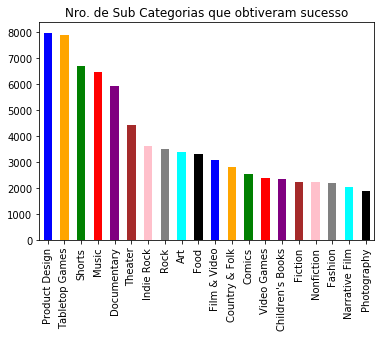

In [0]:
top_20_sub_categorias_com_sucesso = df[df["state"] == "successful"]["category"].value_counts().head(20)
print("Nro. de Sub Categorias que obtiveram sucesso: ")
print(top_20_sub_categorias_com_sucesso)

top_20_sub_categorias_com_sucesso.plot.bar(color = color)
plt.title("Nro. de Sub Categorias que obtiveram sucesso")
plt.show()

Nro. de Moedas
USD    295365
GBP     34132
EUR     17405
CAD     14962
AUD      7950
SEK      1788
MXN      1752
NZD      1475
DKK      1129
CHF       768
NOK       722
HKD       618
SGD       555
JPY        40
Name: currency, dtype: int64


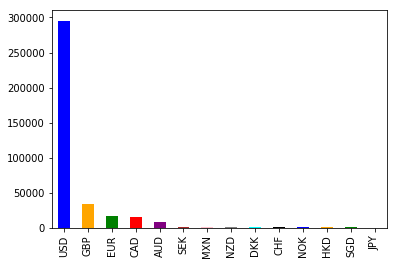

In [0]:
principais_moedas = df["currency"].value_counts()
print("Nro. de Moedas")
print(principais_moedas)

principais_moedas.plot.bar(color = color)
plt.show()

Nro. de Países
US      292627
GB       33672
CA       14756
AU        7839
DE        4171
N,0"      3797
FR        2939
IT        2878
NL        2868
ES        2276
SE        1757
MX        1752
NZ        1447
DK        1113
IE         811
CH         761
NO         708
HK         618
BE         617
AT         597
SG         555
LU          62
JP          40
Name: country, dtype: int64


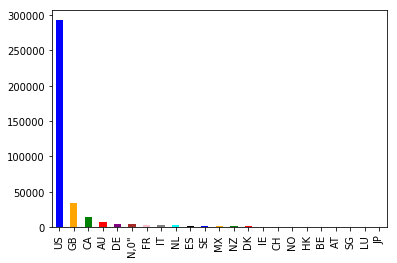

In [0]:
principais_paises = df["country"].value_counts()
print("Nro. de Países")
print(principais_paises)

principais_paises.plot.bar(color = color)
plt.show()

Nro. de Projetos por Status
failed        197719
successful    133956
canceled       38779
undefined       3562
live            2799
suspended       1846
Name: state, dtype: int64


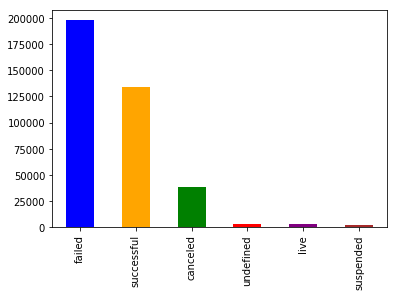

In [0]:
principais_resultados = df["state"].value_counts()
print("Nro. de Projetos por Status")
print(principais_resultados)

principais_resultados.plot.bar(color = color)
plt.show()

# Preparação dos Dados

Neste momento, é realizada a preparação dos dados antes de executar o modelo utilizado. A preparação é um dos momentos mais importantes ao realizar um modelo, isto porque sem ela, haveria inconsisências nos dados, deixando-os imprecisos. Sem o processo de preparação, o nível de precisão da classificação ficará comprometido.

In [0]:
print("Retirando os status 'undefined' e 'live' do model...")
df = df[df["state"].isin(["failed", "canceled", "successful", "suspended"])].copy()
print(df.shape)

Retirando os status 'undefined' e 'live' do model...
(372300, 10)


In [0]:
print("Deletando colunas que não usaremos...")
df = df.drop('ID', 1)
df = df.drop('name', 1)
df = df.drop('usd pledged', 1)
df = df.drop('usd_pledged_real', 1)
df = df.drop('backers', 1)

print(df.shape)

Deletando colunas que não usaremos...
(372300, 10)


In [101]:
print("Cria uma nova coluna chamada 'duration_days' que é 'deadline' - 'launched'")
df['launched'] = pd.to_datetime(df['launched'])
df['deadline'] = pd.to_datetime(df['deadline'])
df['duration_days'] = df['deadline'].subtract(df['launched'])
df['duration_days'] = df['duration_days'].astype('timedelta64[D]')

Cria uma nova coluna chamada 'duration_days' que é 'deadline' - 'launched'


In [102]:
print("Deletando colunas: launched, deadline and pledged")
df = df.drop('launched', 1)
df = df.drop('deadline', 1)
df = df.drop('pledged', 1)

(372300, 11)


In [0]:
#antes de eliminar boa parte dos outliers
import seaborn as sns
sns.boxplot(x=df['goal'])

In [104]:
#tirando os outliers
df = df[(df['goal'] <= 100000) & (df['goal'] >= 1000)].copy()
df.shape

(312635, 11)

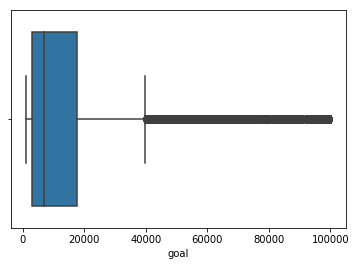

In [105]:
#depois de eliminar boa parte dos outliers
import seaborn as sns
sns.boxplot(x=df['goal'])